In [1]:
!pip install pandas
!pip install requests
!pip install bs4 as bs
!pip install plotly
!pip install dash pandas
!pip install html5lib

  Using cached bs4-0.0.2-py2.py3-none-any.whl.metadata (411 bytes)
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


# ARTILHARIA EUROPEIA

In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Função genérica para extrair tabelas HTML de uma página
def read_html_tables(url):
    try:
        response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        tables = pd.read_html(str(soup))
        return tables if tables else None
    except (requests.exceptions.RequestException, ValueError) as e:
        print(f'Erro ao acessar {url} -> {e}')
        return None

# Dicionário com nome da liga e URL correspondente
campeonatos = {
    'Premier League': 'https://www.espn.com.br/futebol/estatisticas/_/liga/ENG.1/temporada/2023',
    'FA Cup': 'https://www.espn.com.br/futebol/estatisticas/_/liga/eng.fa',
    'La Liga': 'https://www.espn.com.br/futebol/estatisticas/_/liga/ESP.1/temporada/2023',
    'Copa del Rey': 'https://www.espn.com.br/futebol/estatisticas/_/liga/esp.copa_del_rey',
    'Serie A': 'https://www.espn.com.br/futebol/estatisticas/_/liga/ITA.1/temporada/2023',
    'Coppa Italia': 'https://www.espn.com.br/futebol/estatisticas/_/liga/ita.coppa_italia',
    'Ligue 1': 'https://www.espn.com.br/futebol/estatisticas/_/liga/FRA.1/temporada/2023',
    'Coupe de France': 'https://www.espn.com.br/futebol/estatisticas/_/liga/fra.coupe_de_france',
    'Champions League': 'https://www.espn.com.br/futebol/estatisticas/_/liga/uefa.champions',
    'Europa League': 'https://www.espn.com.br/futebol/estatisticas/_/liga/uefa.europa'
}

# Dicionário para armazenar os DataFrames
estatisticas = {}

# Iterar pelas ligas e coletar os dados
for nome, url in campeonatos.items():
    tabelas = read_html_tables(url)
    if tabelas and len(tabelas) >= 2:
        estatisticas[f'artilharia_{nome}'] = pd.DataFrame(tabelas[0])
        estatisticas[f'assistencias_{nome}'] = pd.DataFrame(tabelas[1])
    else:
        estatisticas[f'artilharia_{nome}'] = None
        estatisticas[f'assistencias_{nome}'] = None

# Exemplo de acesso:
# print(estatisticas['artilharia_Premier League'])
# print(estatisticas['assistencias_La Liga'])


/tmp/ipykernel_7156/1336065431.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))
/tmp/ipykernel_7156/1336065431.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))
/tmp/ipykernel_7156/1336065431.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))
/tmp/ipykernel_7156/1336065431.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))
/tmp/ipykernel_7156/1336065431.p

Erro ao acessar https://www.espn.com.br/futebol/estatisticas/_/liga/ita.coppa_italia -> No tables found


/tmp/ipykernel_7156/1336065431.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))
/tmp/ipykernel_7156/1336065431.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))
/tmp/ipykernel_7156/1336065431.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


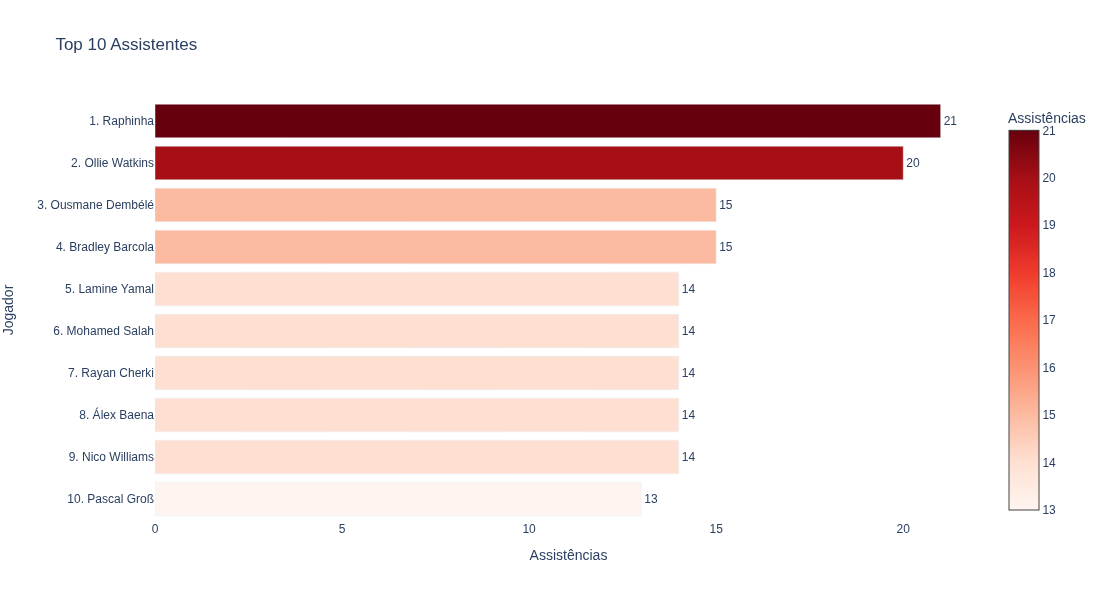

In [41]:
import pandas as pd
import plotly.graph_objects as go

# Concatenar os DataFrames
assistencias_geral = pd.concat([
    assistencias_eng, assistencias_FA_CUP, assistencias_esp, assistencias_rey,
    assistencias_ita, assistencias_calcio_cup, assistencias_fra, assistencias_fra_cup,
    assistencias_champions, assistencias_euro_league
])

# Agrupar por nome e somar as colunas numéricas
assistencias_geral = assistencias_geral.groupby('Nome')[['P', 'A']].sum().reset_index()

# Ordenar por número de assistências
assistencias_geral.sort_values('A', ascending=False, inplace=True)

# Redefinir a posição
assistencias_geral['POS'] = range(1, len(assistencias_geral) + 1)

# Reordenar colunas
assistencias_geral = assistencias_geral[['POS', 'Nome', 'P', 'A']]

# Top 10
top_10 = assistencias_geral.head(10).copy()
top_10 = top_10[::-1].reset_index(drop=True)

# Adicionar posição ao nome
top_10['Nome'] = top_10['POS'].astype(str) + '. ' + top_10['Nome']

# Calcular média por jogo
top_10['Media'] = top_10['A'] / top_10['P']

# Criar o gráfico
fig = go.Figure(go.Bar(
    x=top_10['A'],
    y=top_10['Nome'],
    orientation='h',
    marker=dict(
        color=top_10['A'],
        colorscale='Reds',
        showscale=True,
        colorbar=dict(title='Assistências')
    ),
    text=top_10['A'],
    textposition='outside',
    customdata=top_10[['P', 'Media']],
    hovertemplate=(
        '<b>%{y}</b><br>' +
        'Assistências: %{x}<br>' +
        'Partidas: %{customdata[0]}<br>' +
        'Média por jogo: %{customdata[1]:.2f}<extra></extra>'
    )
))

# Layout
fig.update_layout(
    title=f'Top 10 Assistentes',
    xaxis_title='Assistências',
    yaxis_title='Jogador',
    height=600,
    plot_bgcolor='white'
)

fig.show()


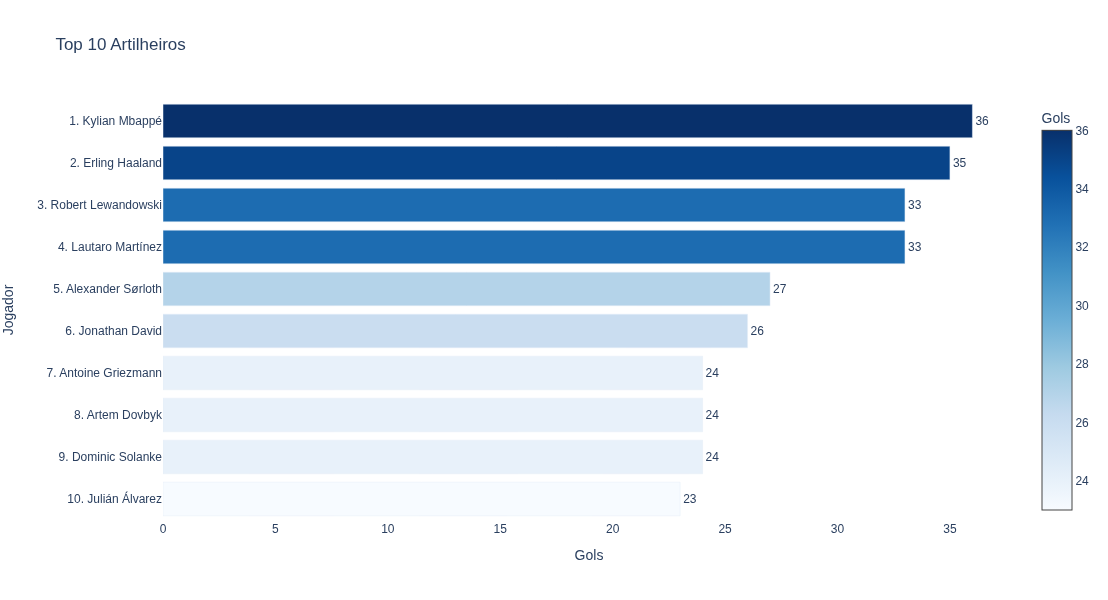

In [42]:
import pandas as pd
import plotly.graph_objects as go

# Concatenar os DataFrames verticalmente
artilharia_geral = pd.concat([
    artilharia_eng, artilharia_FA_CUP, artilharia_esp, artilharia_rey,
    artilharia_ita, artilharia_calcio_cup, artilharia_fra, artilharia_fra_cup,
    artilharia_champions, artilharia_euro_league
])

# Agrupar por nome e somar os valores das colunas numéricas
artilharia_geral = artilharia_geral.groupby('Nome')[['P', 'G']].sum().reset_index()

# Ordenar por gols
artilharia_geral.sort_values('G', ascending=False, inplace=True)

# Redefinir posição
artilharia_geral['POS'] = range(1, len(artilharia_geral) + 1)

# Reorganizar colunas
artilharia_geral = artilharia_geral[['POS', 'Nome', 'P', 'G']]

# Selecionar top 10 e inverter para mostrar maior no topo
top_10 = artilharia_geral.head(10).copy()
top_10 = top_10[::-1].reset_index(drop=True)

# Adicionar posição ao nome
top_10['Nome'] = top_10['POS'].astype(str) + '. ' + top_10['Nome']

# Calcular média de gols por jogo
top_10['Media'] = top_10['G'] / top_10['P']

# Gráfico
fig = go.Figure(go.Bar(
    x=top_10['G'],
    y=top_10['Nome'],
    orientation='h',
    marker=dict(
        color=top_10['G'],
        colorscale='Blues',
        showscale=True,
        colorbar=dict(title='Gols')
    ),
    text=top_10['G'],
    textposition='outside',
    customdata=top_10[['P', 'Media']],
    hovertemplate=(
        '<b>%{y}</b><br>' +
        'Gols: %{x}<br>' +
        'Partidas: %{customdata[0]}<br>' +
        'Média por jogo: %{customdata[1]:.2f}<extra></extra>'
    )
))

# Layout
fig.update_layout(
    title=f'Top 10 Artilheiros',
    xaxis_title='Gols',
    yaxis_title='Jogador',
    height=600,
    plot_bgcolor='white'
)

fig.show()


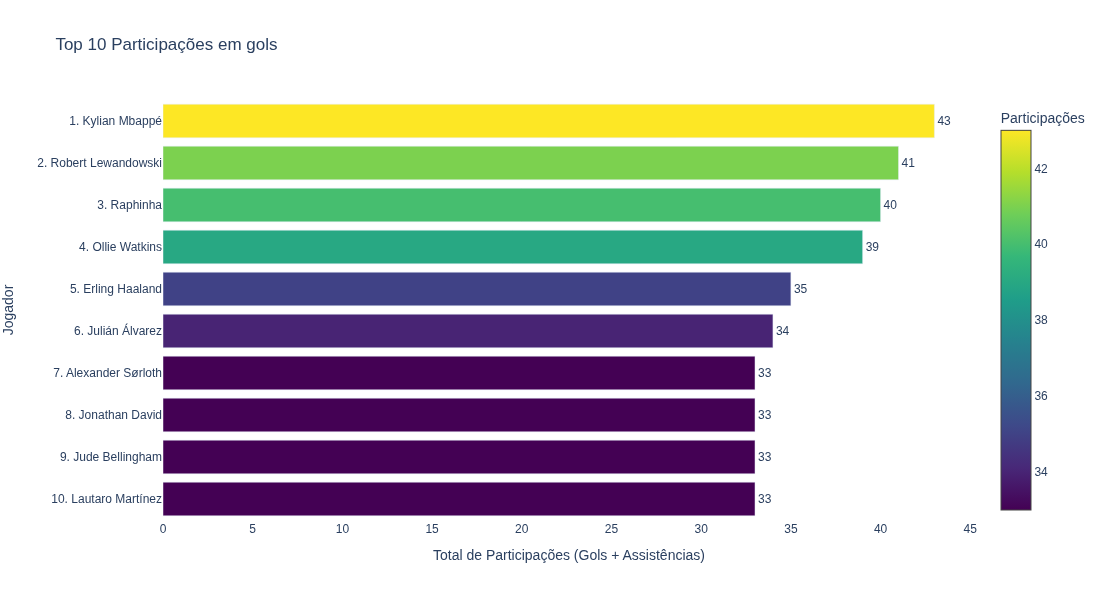

In [48]:
import pandas as pd
import plotly.graph_objects as go

# Concatenar os DataFrames
Participacoes_geral = pd.concat([artilharia_geral, assistencias_geral], ignore_index=True)

# Preencher valores NaN com 0 para garantir soma correta
Participacoes_geral.fillna(0, inplace=True)

# Agrupar por nome e somar colunas 'G', 'A' e 'P'
Participacoes_geral = Participacoes_geral.groupby('Nome').agg({'G': 'sum','A': 'sum','P': 'max'}).reset_index()

# Calcular o total de participações
Participacoes_geral['Total'] = Participacoes_geral['G'] + Participacoes_geral['A']

# Ordenar e selecionar top 10
Participacoes_geral.sort_values('Total', ascending=False, inplace=True)
Participacoes_geral.reset_index(drop=True, inplace=True)
top_10 = Participacoes_geral.head(10).copy()
top_10 = top_10[::-1].reset_index(drop=True)

# Adicionar posição ao nome
top_10['POS'] = range(1, 11)[::-1]
top_10['Nome'] = top_10['POS'].astype(str) + '. ' + top_10['Nome']

# Calcular média de participação por jogo
top_10['Media'] = top_10['Total'] / top_10['P']

# Criar gráfico
fig = go.Figure(go.Bar(
    x=top_10['Total'],
    y=top_10['Nome'],
    orientation='h',
    marker=dict(
        color=top_10['Total'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title='Participações')
    ),
    text=top_10['Total'],
    textposition='outside',
    customdata=top_10[['G', 'A', 'P', 'Media']],
    hovertemplate=(
        '<b>%{y}</b><br>' +
        'Gols: %{customdata[0]}<br>' +
        'Assistências: %{customdata[1]}<br>' +
        'Partidas: %{customdata[2]}<br>' +
        'Média por jogo: %{customdata[3]:.2f}<extra></extra>'
    )
))

# Layout
fig.update_layout(
    title=f'Top 10 Participações em gols',
    xaxis_title='Total de Participações (Gols + Assistências)',
    yaxis_title='Jogador',
    height=600,
    plot_bgcolor='white'
)

fig.show()


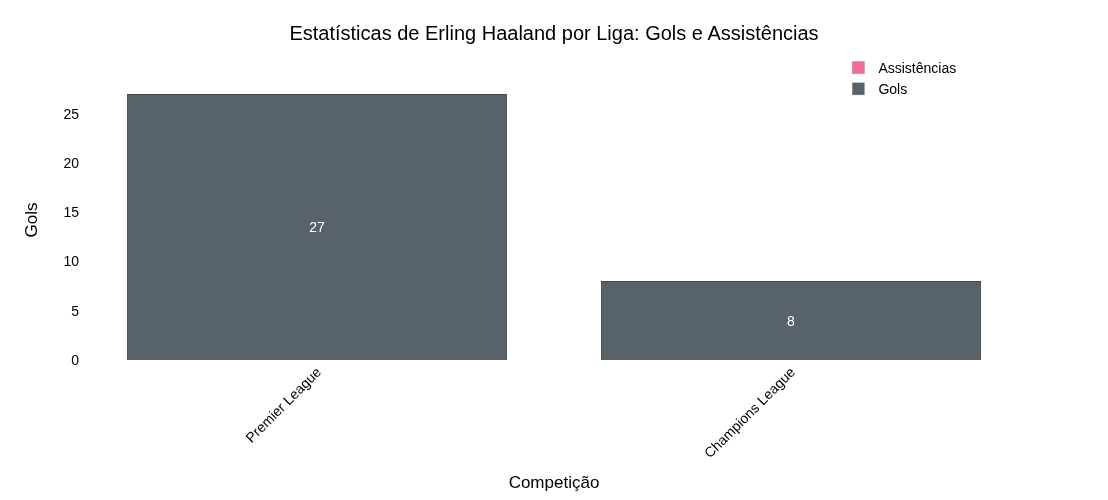

In [40]:
import plotly.graph_objects as go
import numpy as np

def dashboard_unico_jogador(ligas, nome_jogador):
    ligas_validas = []
    gols = []
    assistencias = []

    for liga, (artilharia, assistencia) in ligas.items():
        if artilharia is None or assistencia is None:
            continue
        artilharia.columns = artilharia.columns.str.strip()
        assistencia.columns = assistencia.columns.str.strip()

        jogador_art = artilharia[artilharia['Nome'] == nome_jogador]
        jogador_ass = assistencia[assistencia['Nome'] == nome_jogador]

        if jogador_art.empty and jogador_ass.empty:
            continue

        gols_val = jogador_art['G'].sum() if not jogador_art.empty else 0
        assist_val = jogador_ass['A'].sum() if not jogador_ass.empty else 0

        ligas_validas.append(liga)
        gols.append(gols_val)
        assistencias.append(assist_val)

    if not ligas_validas:
        print(f"Nenhum dado encontrado para {nome_jogador}")
        return

    fig = go.Figure()

    # Barra de gols
    fig.add_trace(go.Bar(
        x=ligas_validas,
        y=gols,
        name='Gols',
        marker_color='rgb(58, 71, 80)',
        text=[str(g) if g > 0 else '' for g in gols],
        textposition='inside',
        insidetextanchor='middle',
        hovertemplate='%{x}<br>Gols: %{y}<extra></extra>',
        marker_line=dict(width=1, color='rgba(0,0,0,0.2)'),
        opacity=0.85
    ))

    # Barra de assistências empilhada em cima dos gols
    fig.add_trace(go.Bar(
        x=ligas_validas,
        y=assistencias,
        name='Assistências',
        marker_color='rgb(246, 78, 139)',
        text=[str(a) if a > 0 else '' for a in assistencias],
        textposition='inside',
        insidetextanchor='middle',
        hovertemplate='%{x}<br>Assistências: %{y}<extra></extra>',
        marker_line=dict(width=1, color='rgba(0,0,0,0.2)'),
        opacity=0.85
    ))

    fig.update_layout(
        title=dict(
            text=f'Estatísticas de {nome_jogador} por Liga: Gols e Assistências',
            x=0.5,
            xanchor='center',
            font=dict(size=20)
        ),
        barmode='stack',
        xaxis=dict(title='Competição', tickangle=-45),
        yaxis=dict(title='Gols', zeroline=False),
        plot_bgcolor='white',
        paper_bgcolor='white',
        font=dict(family='Arial, sans-serif', size=14, color='black'),
        legend=dict(x=0.8, y=1.1, bgcolor='rgba(255,255,255,0)', bordercolor='rgba(0,0,0,0)'),
        height=500,
        margin=dict(t=80, b=100)
    )

    fig.show()

# Use assim:
dashboard_unico_jogador(ligas, 'Erling Haaland')